## Public NDS2 example

Shows how to get LIGO data from a public NDS2 server

For additional documentation, see https://gw-openscience.org

### Setup the enviornment

In [1]:
# -- Install gwpy if running in Google Co-lab
try:
    import google.colab
    ! pip install gwpy
except:
    pass

from gwpy.detector import ChannelList, Channel
from gwpy.timeseries import TimeSeries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Fetch data, plot it, and save to a text file

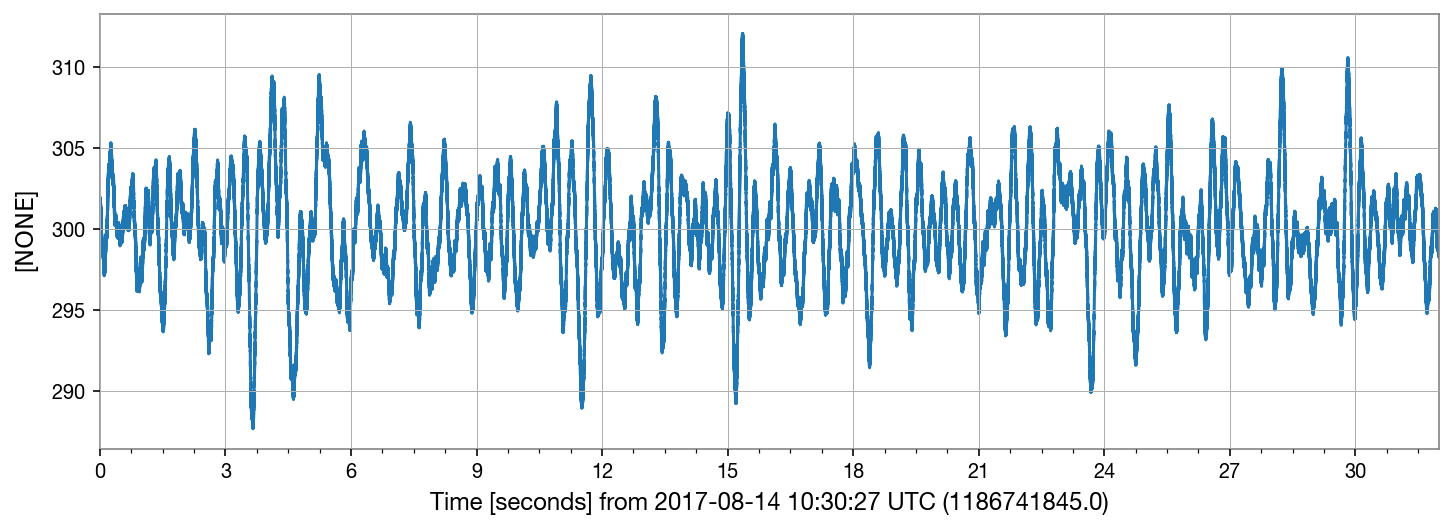

In [2]:
t0 = 1186741861.5  #-- GW170814
start = int(t0-16)
end = int(t0+16)
server ='losc-nds.ligo.org'  #-- GWOSC NDS2 server name

darm_data = TimeSeries.fetch('L1:LSC-DARM_OUT_DQ', start=start, end=end, host=server)
darm_data.plot()

# -- Output data to a txt file
darm_data.write("data.txt")

### Query for all channels

In [3]:
chanlist = ChannelList.query_nds2('*', host='losc-nds.ligo.org' )

print("Found {0} channels\n".format(len(chanlist)))
print("Printing first 10 channels ...")
for chan in chanlist[0:10]:
    print(chan.name, chan.sample_rate)

Found 1169 channels

Printing first 10 channels ...
H1:ASC-AS_A_DC_NSUM_OUT_DQ 2048.0 Hz
H1:ASC-CHARD_P_IN1_DQ 256.0 Hz
H1:ASC-CHARD_P_OUT_DQ 512.0 Hz
H1:ASC-CHARD_Y_IN1_DQ 256.0 Hz
H1:ASC-CHARD_Y_OUT_DQ 512.0 Hz
H1:ASC-CSOFT_P_IN1_DQ 256.0 Hz
H1:ASC-CSOFT_P_OUT_DQ 512.0 Hz
H1:ASC-CSOFT_Y_IN1_DQ 256.0 Hz
H1:ASC-CSOFT_Y_OUT_DQ 512.0 Hz
H1:ASC-DHARD_P_IN1_DQ 256.0 Hz


### Filter channel list 

In [4]:
darmlist = [chan for chan in chanlist if 'DARM' in chan.name]
print("Here are channels containing DARM in the name ...")
for chan in darmlist:
    print(chan.name, chan.sample_rate)

Here are channels containing DARM in the name ...
H1:LSC-DARM_IN1_DQ 16384.0 Hz
H1:LSC-DARM_OUT_DQ 16384.0 Hz
L1:LSC-DARM_IN1_DQ 16384.0 Hz
L1:LSC-DARM_OUT_DQ 16384.0 Hz


### Check when channels are available

In [5]:
# -- Check availability
available = chanlist.query_nds2_availability(darmlist, 0, 1269892991, host=server)
for chan in darmlist:
    print(chan.name, 'is available at GPS:', available[chan])

H1:LSC-DARM_IN1_DQ is available at GPS: [[1186736512 ... 1186747264)]
H1:LSC-DARM_OUT_DQ is available at GPS: [[1186736512 ... 1186747264)]
L1:LSC-DARM_IN1_DQ is available at GPS: [[1186736512 ... 1186747264)]
L1:LSC-DARM_OUT_DQ is available at GPS: [[1186736512 ... 1186747264)]


### Make a Q-transform of the data

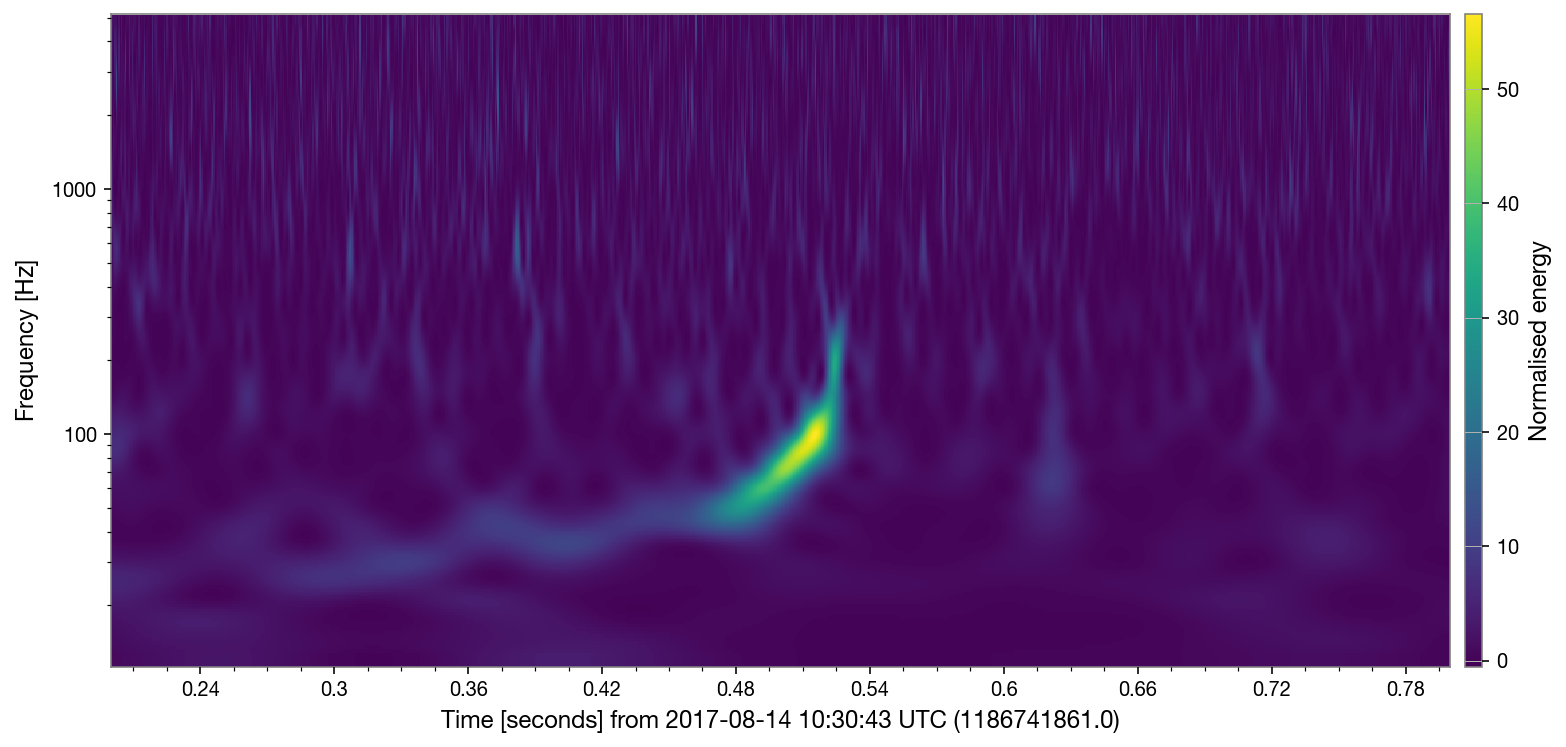

In [6]:
dt = 0.3  #-- Set width of q-transform plot, in seconds
hq = darm_data.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalised energy")
ax.grid(False)
ax.set_yscale('log')